<a href="https://colab.research.google.com/github/isahaasasu/MAT422/blob/main/HW3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 3.2**

## Limits and Continuity

In [6]:
import sympy as sym
from sympy import limit, Symbol

x = sym.symbols('x')
print('The limit of the expression evalutates to:', sym.limit(.5**x+7, x, sym.oo))
# The limit of this exponential function is 7 as x approaches infinity.

f = sym.sin(x)
print('The limit of the expression evalutates to:', sym.limit(f, x, sym.oo))
# This function does not have a limit, because it oscillates between -1 and 1.

x = sym.symbols('x')
print('The limit of the expression evalutates to:', sym.limit((x+2)/(x*x-x-6), x, -2))
# The limit of this rational funtion is -1/5.

w = Symbol('x')
print('The limit of the expression evalutates to:', limit(1/w, w, 0))

The limit of the expression evalutates to: 7
The limit of the expression evalutates to: AccumBounds(-1, 1)
The limit of the expression evalutates to: -1/5
The limit of the expression evalutates to: oo


(-500.0, 9500.0)

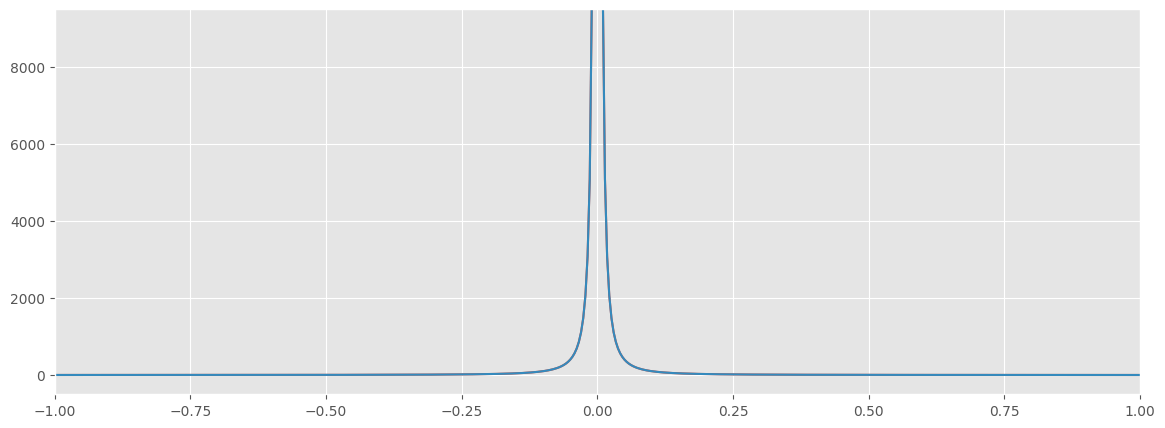

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return 1.0 / x ** 2.0

fx1 = np.linspace(-2, 2, 1000)
plt.figure(figsize=(14,5))
plt.plot(fx1, f1(fx1), fx1, f1(fx1))
plt.xlim([-1, 1])
plt.ylim([-500, 9500])

## Derivatives

In [11]:
x = sym.symbols('x')

# diff (function, independent variable, number of derivatives)

first = sym.diff(4*x*x*x+2*x*x-11*x+6, x)
print('1st derivative: ', first)

second = sym.diff(4*x*x*x+2*x*x-11*x+6, x, 2)
print('2nd derivative: ', second)

third = sym.diff(4*x*x*x+2*x*x-11*x+6, x, 3)
print('3rd derivative: ', third)

fourth = sym.diff(4*x*x*x+2*x*x-11*x+6, x, 4)
print('4th derivative: ', fourth)

1st derivative:  12*x**2 + 4*x - 11
2nd derivative:  4*(6*x + 1)
3rd derivative:  24
4th derivative:  0


In [16]:
from sympy import symbols, diff

#differentiating a simple polynomial

x = symbols('x')
f = 3*x**2 + 2*x + 1
f_prime = diff(f, x)
print(f_prime)

6*x + 2


In [17]:
from sympy import symbols, sin, diff

#differentiating a trigonometric function

x = symbols('x')
f = sin(x)
f_prime = diff(f, x)
print(f_prime)

cos(x)


In [19]:
from sympy import symbols, diff

#partial differentiation

x, y, z = symbols('x y z', real=True)
f = 4*x*y + x*sin(z) + x**3 + z**8*y
diff(f, x)

3*x**2 + 4*y + sin(z)

In [14]:
import sympy as sym

#Power rule

x = sym.Symbol('x')
f = x**5
f.diff(x)

5*x**4

In [15]:
import sympy as sym

#Product Rule

x = sym.Symbol('x')
f = sym.exp(x)*sym.cos(x)
derivative_f = f.diff(x)
derivative_f

-exp(x)*sin(x) + exp(x)*cos(x)

## Taylor's Theorem

<ipython-input-22-7de747dd0d0b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


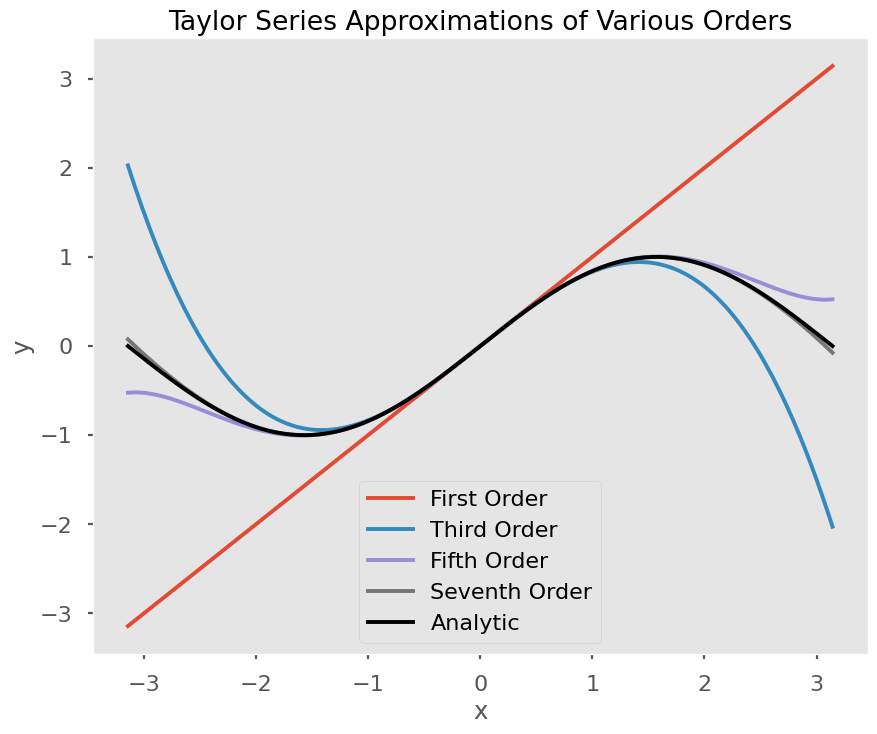

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Third Order', 'Fifth Order', 'Seventh Order']

plt.figure(figsize = (10,8))
for n, label in zip(range(4), labels):
    y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
    plt.plot(x,y, label = label)

plt.plot(x, np.sin(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [20]:
def Taylor_polynomial_sympy(function_expression, variable_list, evaluation_point, degree):
    """
    Mathematical formulation reference:
    https://math.libretexts.org/Bookshelves/Calculus/Supplemental_Modules_(Calculus)/Multivariable_Calculus/3%3A_Topics_in_Partial_Derivatives/Taylor__Polynomials_of_Functions_of_Two_Variables
    :param function_expression: Sympy expression of the function
    :param variable_list: list. All variables to be approximated (to be "Taylorized")
    :param evaluation_point: list. Coordinates, where the function will be expressed
    :param degree: int. Total degree of the Taylor polynomial
    :return: Returns a Sympy expression of the Taylor series up to a given degree, of a given multivariate expression, approximated as a multivariate polynomial evaluated at the evaluation_point
    """
    from sympy import factorial, Matrix, prod
    import itertools

    n_var = len(variable_list)
    point_coordinates = [(i, j) for i, j in (zip(variable_list, evaluation_point))]  # list of tuples with variables and their evaluation_point coordinates, to later perform substitution

    deriv_orders = list(itertools.product(range(degree + 1), repeat=n_var))  # list with exponentials of the partial derivatives
    deriv_orders = [deriv_orders[i] for i in range(len(deriv_orders)) if sum(deriv_orders[i]) <= degree]  # Discarding some higher-order terms
    n_terms = len(deriv_orders)
    deriv_orders_as_input = [list(sum(list(zip(variable_list, deriv_orders[i])), ())) for i in range(n_terms)]  # Individual degree of each partial derivative, of each term

    polynomial = 0
    for i in range(n_terms):
        partial_derivatives_at_point = function_expression.diff(*deriv_orders_as_input[i]).subs(point_coordinates)  # e.g. df/(dx*dy**2)
        denominator = prod([factorial(j) for j in deriv_orders[i]])  # e.g. (1! * 2!)
        distances_powered = prod([(Matrix(variable_list) - Matrix(evaluation_point))[j] ** deriv_orders[i][j] for j in range(n_var)])  # e.g. (x-x0)*(y-y0)**2
        polynomial += partial_derivatives_at_point / denominator * distances_powered
    return polynomial

In [21]:
from sympy import symbols, sqrt, atan, ln

x = symbols('x')
y = symbols('y')
function_expression = x*sqrt(y)
variable_list = [x,y]
evaluation_point = [1,4]
degree=1
print(Taylor_polynomial_sympy(function_expression, variable_list, evaluation_point, degree))
degree=2
print(Taylor_polynomial_sympy(function_expression, variable_list, evaluation_point, degree))

2*x + y/4 - 1
2*x + y/4 + (x - 1)*(y - 4)/4 - (y - 4)**2/64 - 1
